## <font color="Greenyellow">Trabajo de Fin Master 1: EDA y ETL</font>
<a id="item0"></a> 

### <font color="Greenyellow">0. Indice</font>


* [1. Inicializacion del notebook](#item1)
* [2. EDA (Analisis Exploratorio de Datos)](#item2)
* [3. ETL (Extracción, transformación y carga de datos)](#item3)

***
<a id="item1"></a>
### <font color="Greenyellow">1. Inicializacion del notebook</font>

#### <font color="Greenyellow">1.1. Importacion de librerias</font>

In [72]:
# Analisis y transformacion de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
# Base de datos
import sqlite3
# Funciones propias en carpeta 'funciones
import funciones.funciones as funciones

#### <font color="Greenyellow">1.2. Parametros del notebook</font>

In [73]:
carpeta_datos      = 'data'
carpeta_base_datos = 'bbdd'
nombre_fichero     = 'creditcard.csv'
nombre_bbdd        = 'base_datos_tfm.db'
# Output de datos con 3 decimales
pd.options.display.float_format = '{:.4f}'.format

***
<a id="item2"></a>
### <font color="Greenyellow">2. EDA (Analisis Exploratorio de Datos)</font>
[Volver al indice](#item0)

#### <font color="Greenyellow">2.1. Importacion de datos</font>

In [74]:
# Importamos los datos del fichero card_transdata.csv que esta en la carpeta de carpeta_datos
df_eda = pd.read_csv(carpeta_datos + '/' + nombre_fichero)
df_eda.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [97]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


Observamos 1.000.000 de datos donde aparantemente las 3 primeras columnas son datos de tipo float mientras que las 5 restantes son columnas con datos binarios.

In [75]:
# Visualizamos 5 filas aleatorias del dataframe
df_eda.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190645,128921.0000,-0.0051,0.6294,0.1977,-0.9070,0.5300,-1.3100,1.0617,-0.2113,0.1128,...,-0.1308,-0.3902,0.2047,0.0043,-1.3215,-0.0964,0.1732,0.2477,4.4900,0
269609,163697.0000,-0.6582,0.6327,0.2334,-0.0217,-0.1416,0.2082,0.0168,0.5576,0.0179,...,0.0225,0.1441,0.4966,0.6887,-1.5296,-0.7366,0.3514,0.2637,66.3500,0
188143,127836.0000,-0.1526,0.5751,0.9393,1.4826,-0.1603,-0.2360,0.3290,-0.0074,-0.3159,...,-0.1442,-0.4227,0.3292,-0.1184,-1.0632,0.3416,0.2012,0.2331,89.9000,0
62246,50197.0000,-1.2828,0.8674,2.3077,1.1694,-0.8840,-0.0279,-0.3876,0.7532,-0.6884,...,0.2655,0.5719,-0.1153,0.5351,0.1635,-0.1942,0.2347,0.0495,45.0000,0
245627,152836.0000,-0.0273,0.5085,0.8004,-0.1051,-0.5322,-0.0637,0.1376,0.2023,0.6847,...,0.1554,0.5243,0.1381,-0.1214,-1.1186,-0.5181,0.1056,0.1301,71.0300,0


#### <font color="Greenyellow">2.2. Revision del tipado de los campos</font>

In [76]:
# Revisamos la categoria de cada variable
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos que por defecto todos los campos vienen definidos como float. No obstante, revisando los datos dentro de este apartado hemos observado que varios de los campos son binarios (5 ultimas columnas, incluyendo la variable objetivo) por lo que los deberiamos de transformar a booleanos o integers. Se elige la opcion de transformarlos a int8 lo que adicionalmente esto debe de hacer que el peso del dataframe se reduzca de forma sensible. En esta fase previa el DataFrame ocupa 61 MB.

#### <font color="Greenyellow">2.3. Revision de valores nulos</font>

In [77]:
# Revisamos que no haya valores nulos
print(f"El numero de valores nulos es: {df_eda.isna().sum().sum()}")

El numero de valores nulos es: 0


No se observan valores nulos

#### <font color="Greenyellow">2.4. Analisis variable objetivo</font>

Análisis grafico de la variable objetivo

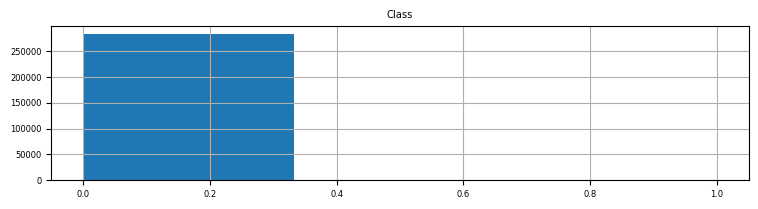

In [78]:
df_eda[['Class']].hist(figsize=(9,2), bins=3);

In [79]:
# Calculamos el porcentaje de fraudes
porcentaje_fraudes = df_eda['Class'].value_counts(normalize=True)
print(f'Porcentaje de fraudes: \n{porcentaje_fraudes}')
# Mostramos el numero de datos por clase
numero_datos_clase = df_eda['Class'].value_counts()
print(f'Numero de datos por clase: \n{numero_datos_clase}')

Porcentaje de fraudes: 
Class
0   0.9983
1   0.0017
Name: proportion, dtype: float64
Numero de datos por clase: 
Class
0    284315
1       492
Name: count, dtype: int64


Como cabe esperar tenemos un dataset muy desbalanceado con un 99.82% de casos negativos y un 0.17% de casos positivos. Esto quiere decir que un modelo que prediga siempre "No" tendria un 99.82% de accuracy por lo que debemos de ser precavidos en las metricas de rendimiento a utilizar.

#### <font color="Greenyellow">2.5. Analisis variables explicativas: Campos 'float'</font>

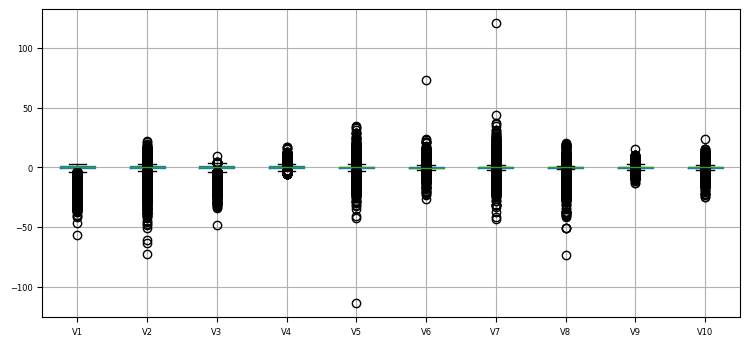

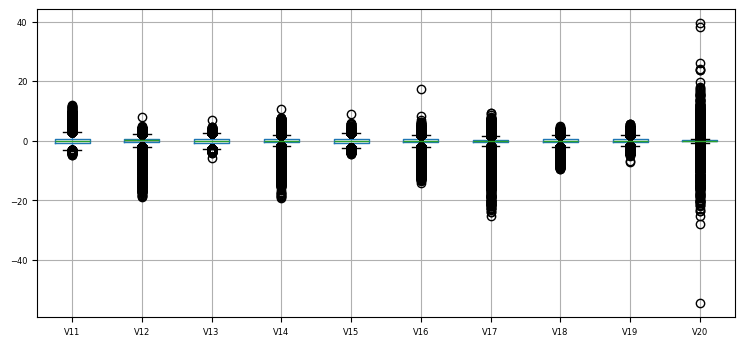

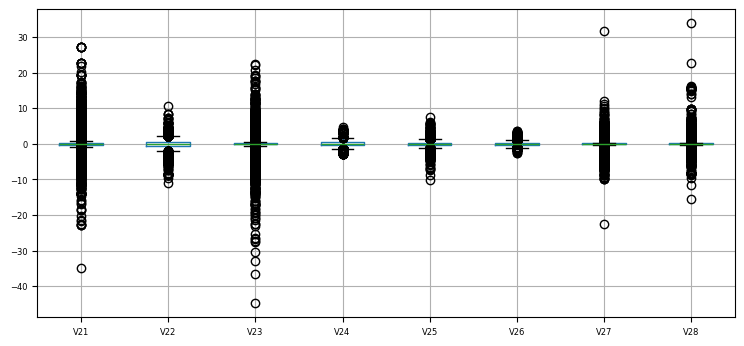

In [80]:
# Visualizamos los boxplots de las variables
df_eda[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']].boxplot(figsize=(9,4))
plt.show()
df_eda[['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']].boxplot(figsize=(9,4))
plt.show()
df_eda[['V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].boxplot(figsize=(9,4))
plt.show()

Text(0.5, 1.0, 'PCA: V1 vs V2')

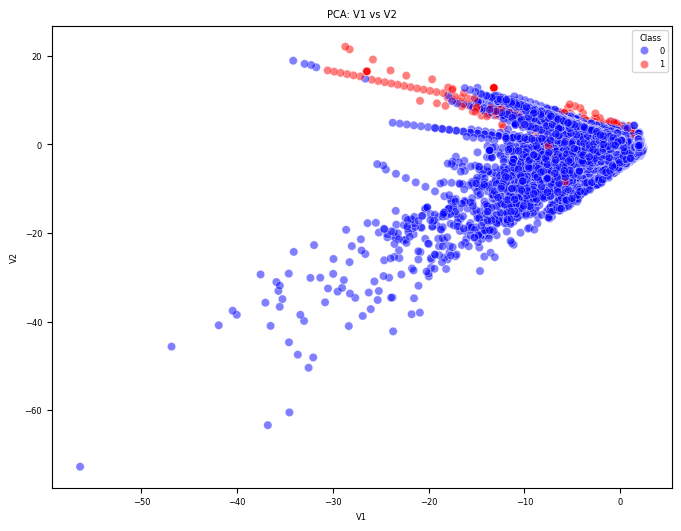

In [81]:
# Hacemos plot de los dos primeros componentes principales del PCA llamado V1 y V2
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_eda, x='V1', y='V2', hue='Class', palette={0:'blue', 1:'red'}, alpha=0.5)
plt.title('PCA: V1 vs V2')

Text(0.5, 1.0, 'PCA: V4 vs V5')

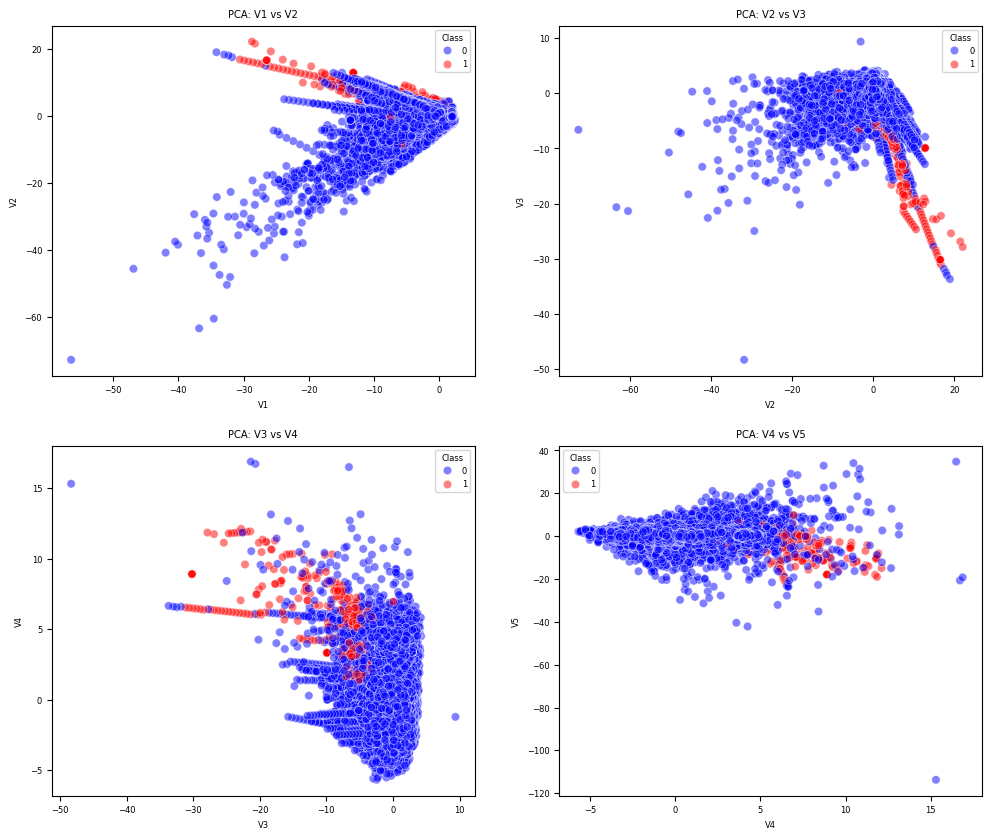

In [82]:
# Hacemos un plot de 4 graficos donde visualizamos V1 con V2, V2 con V3, V3 con V4 y V4 con V5
fig, axs = plt.subplots(2, 2, figsize=(12,10))
sns.scatterplot(data=df_eda, x='V1', y='V2', hue='Class', palette={0:'blue', 1:'red'}, alpha=0.5, ax=axs[0, 0])
axs[0, 0].set_title('PCA: V1 vs V2')
sns.scatterplot(data=df_eda, x='V2', y='V3', hue='Class', palette={0:'blue', 1:'red'}, alpha=0.5, ax=axs[0, 1])
axs[0, 1].set_title('PCA: V2 vs V3')
sns.scatterplot(data=df_eda, x='V3', y='V4', hue='Class', palette={0:'blue', 1:'red'}, alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_title('PCA: V3 vs V4')
sns.scatterplot(data=df_eda, x='V4', y='V5', hue='Class', palette={0:'blue', 1:'red'}, alpha=0.5, ax=axs[1, 1])
axs[1, 1].set_title('PCA: V4 vs V5')

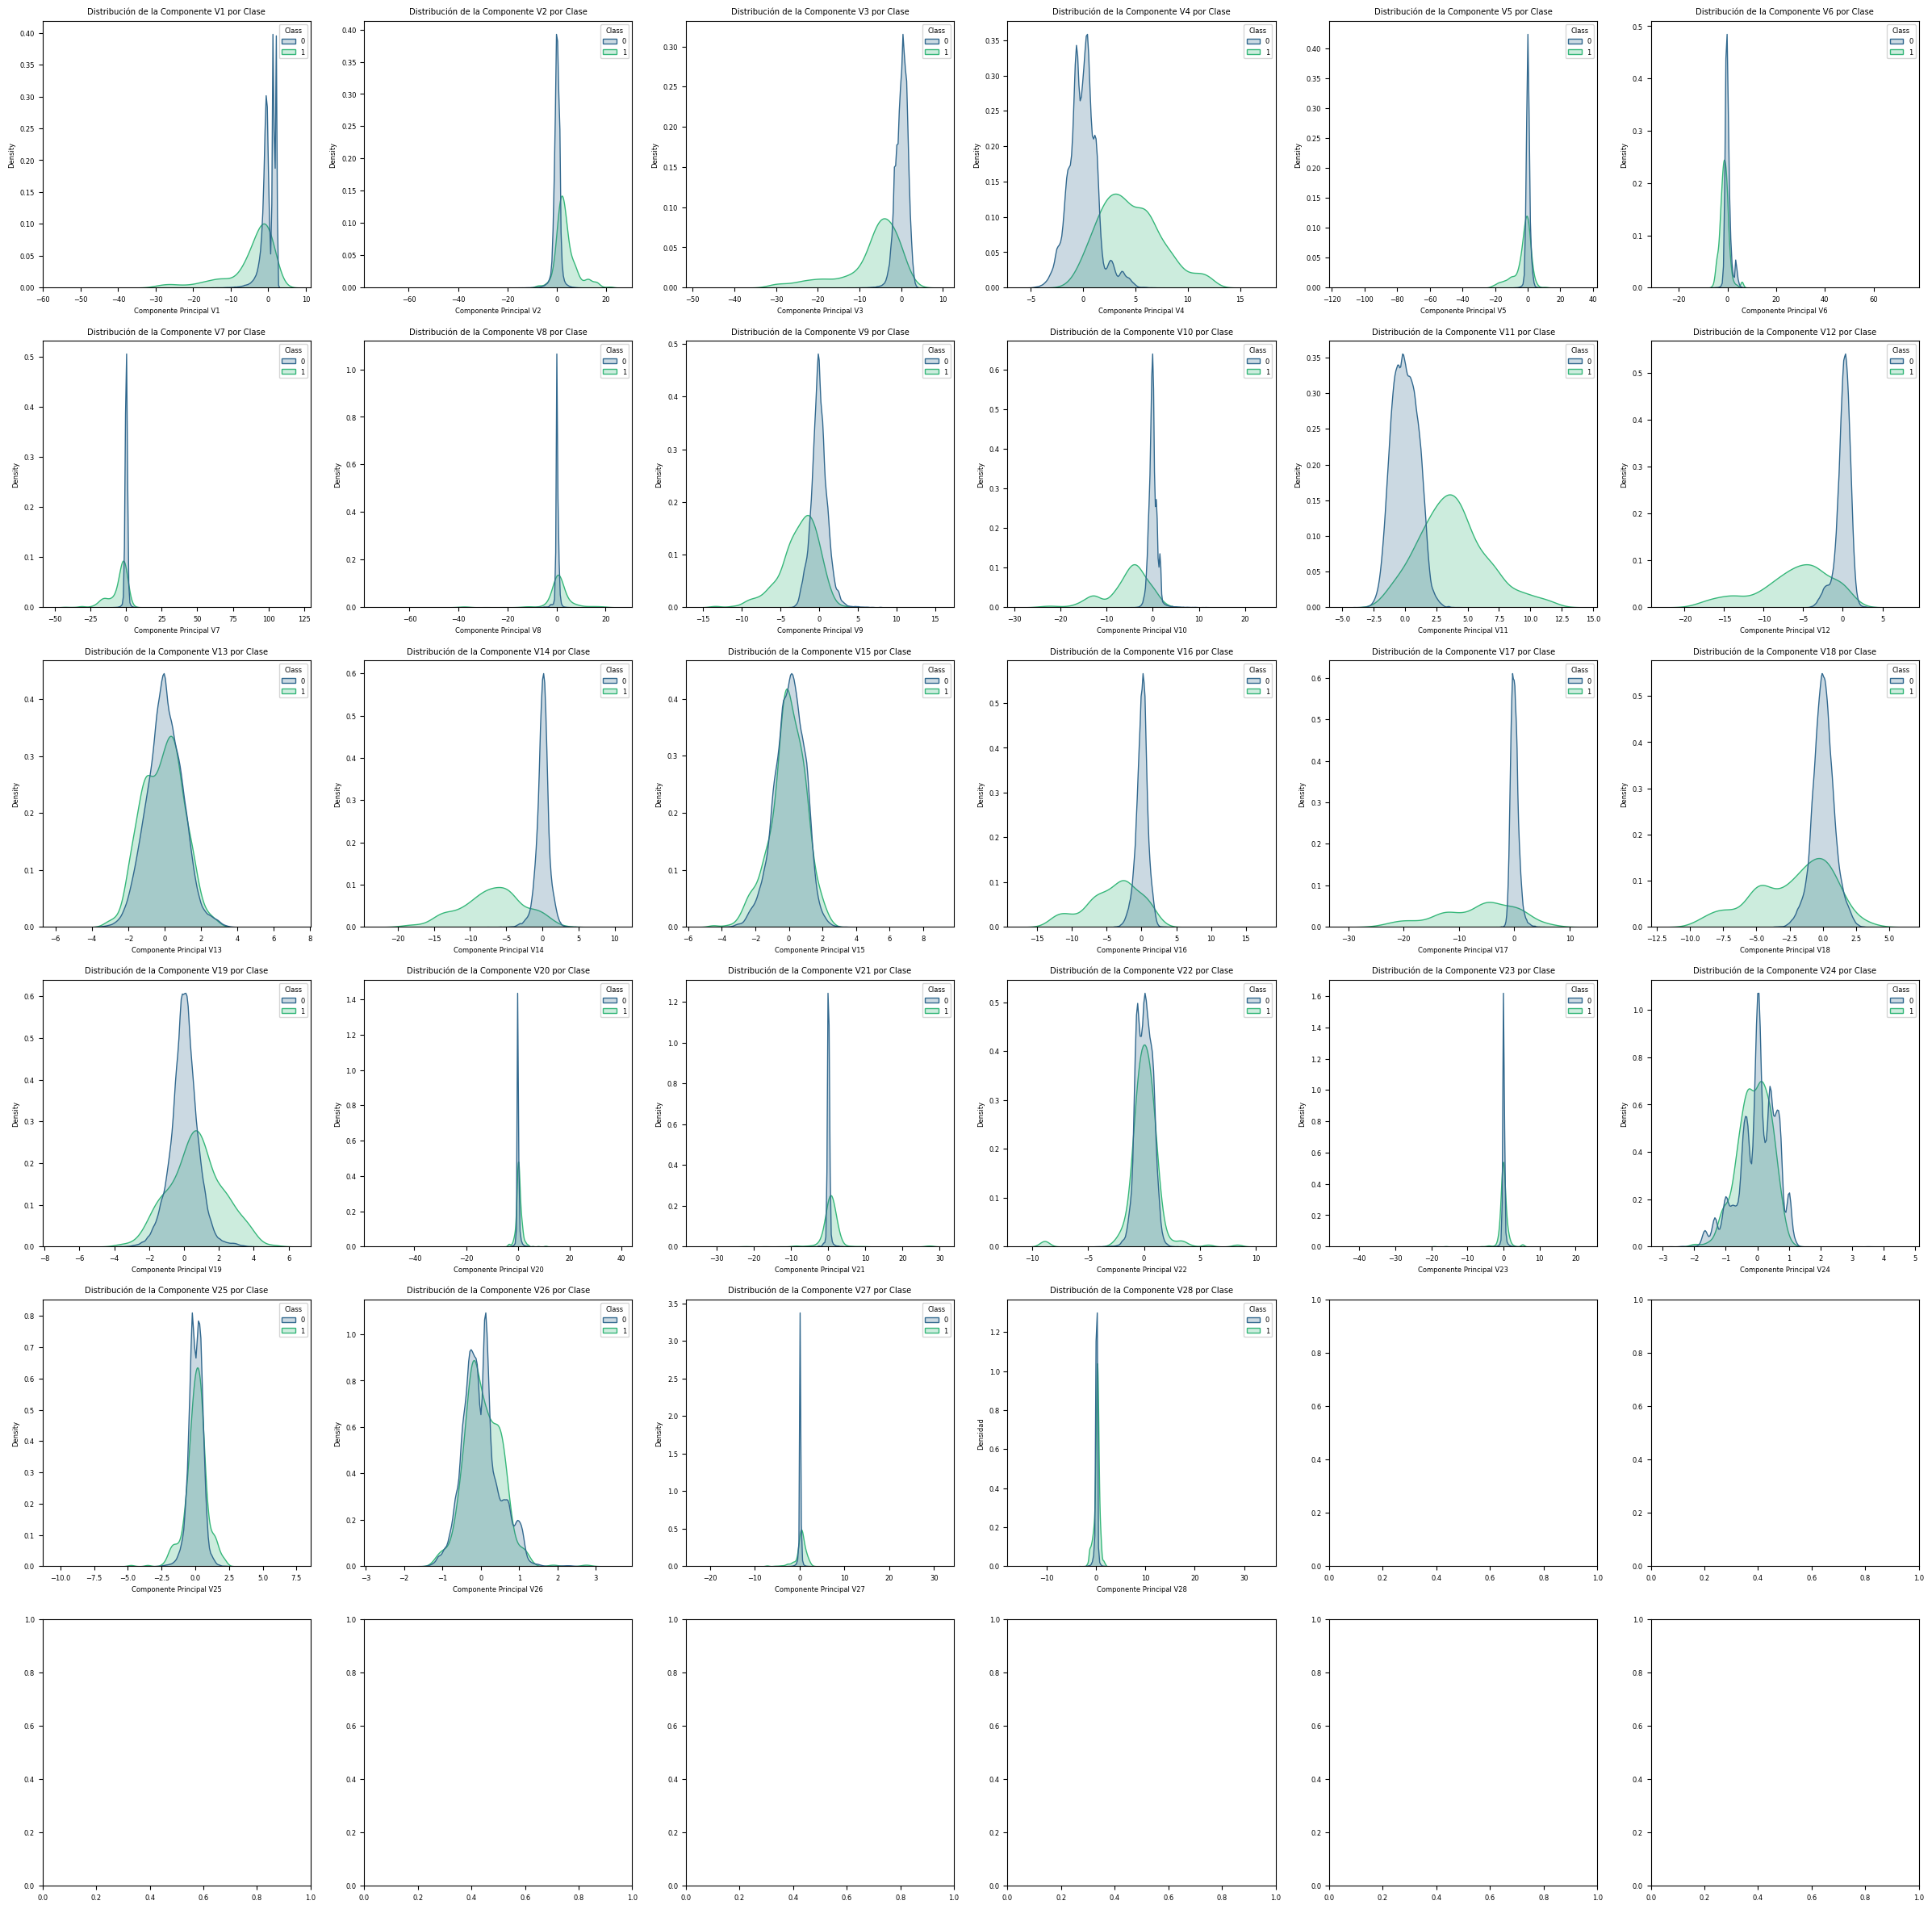

In [83]:
# Hacemos un grafico de 6x6 con los 25 componentes principales del PCA separando un poco los graficos de la fila 1 con los de la fila 2 para que no se solapen los titulos
fig, axs = plt.subplots(6, 6, figsize=(30,30))
componentes = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
for i, x in enumerate(componentes):
    plt.subplot(6, 6, i+1)
    sns.kdeplot(data=df_eda, x=x, hue='Class', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribución de la Componente {x} por Clase')
    plt.xlabel(f'Componente Principal {x}')
plt.ylabel('Densidad')
plt.show()

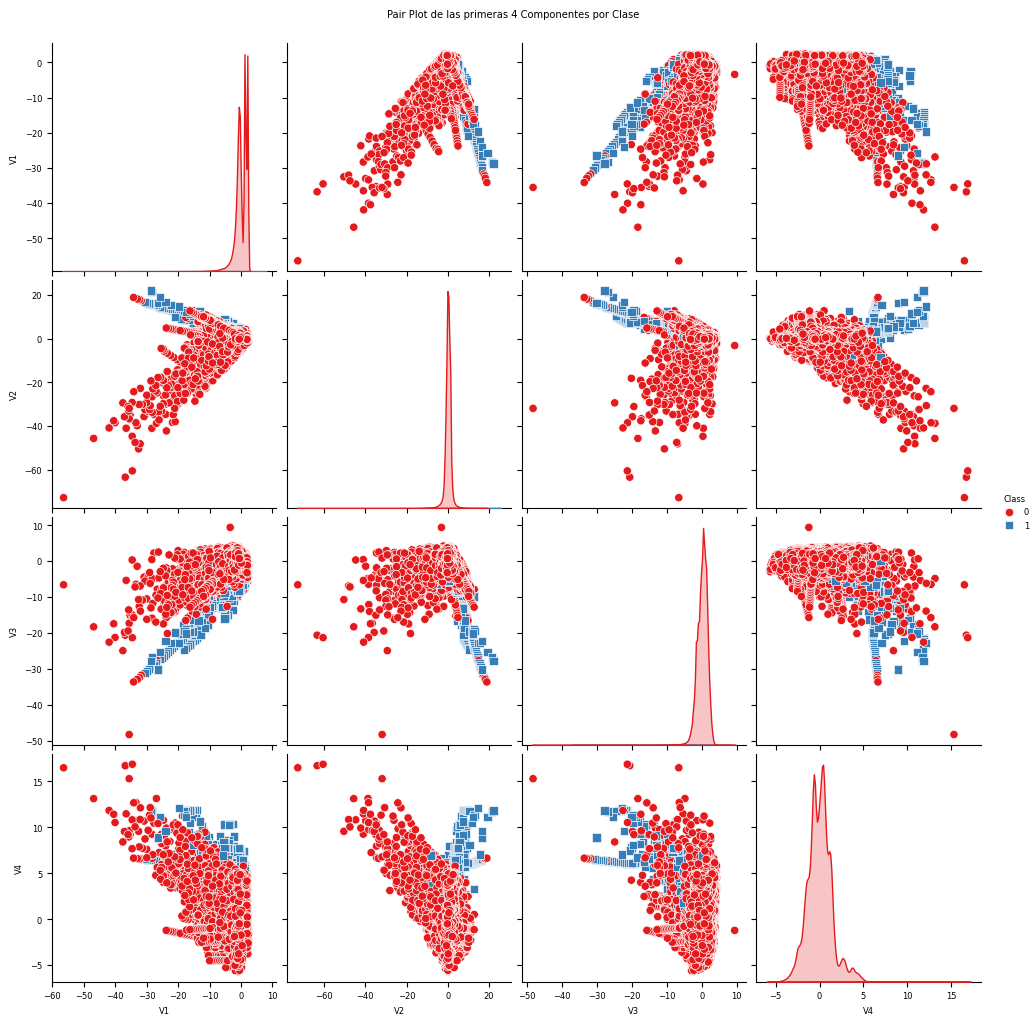

In [84]:
# Seleccionamos solo las primeras 4 componentes y la clase
cols_to_plot = ['V1', 'V2', 'V3', 'V4', 'Class']
sns.pairplot(df_eda[cols_to_plot], hue='Class', markers=['o', 's'], palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot de las primeras 4 Componentes por Clase', y=1.02)
plt.show()

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_9764\2093690731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df_eda, palette='Set2')


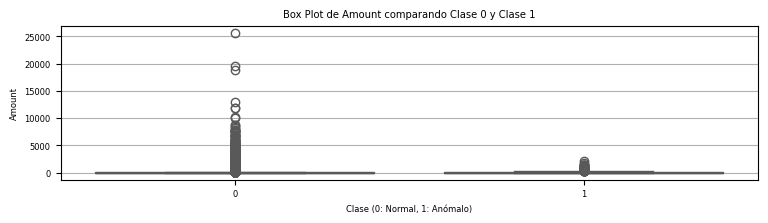

In [85]:
plt.figure(figsize=(9, 2))
sns.boxplot(x='Class', y='Amount', data=df_eda, palette='Set2')
plt.title('Box Plot de Amount comparando Clase 0 y Clase 1')
plt.xlabel('Clase (0: Normal, 1: Anómalo)')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.show()


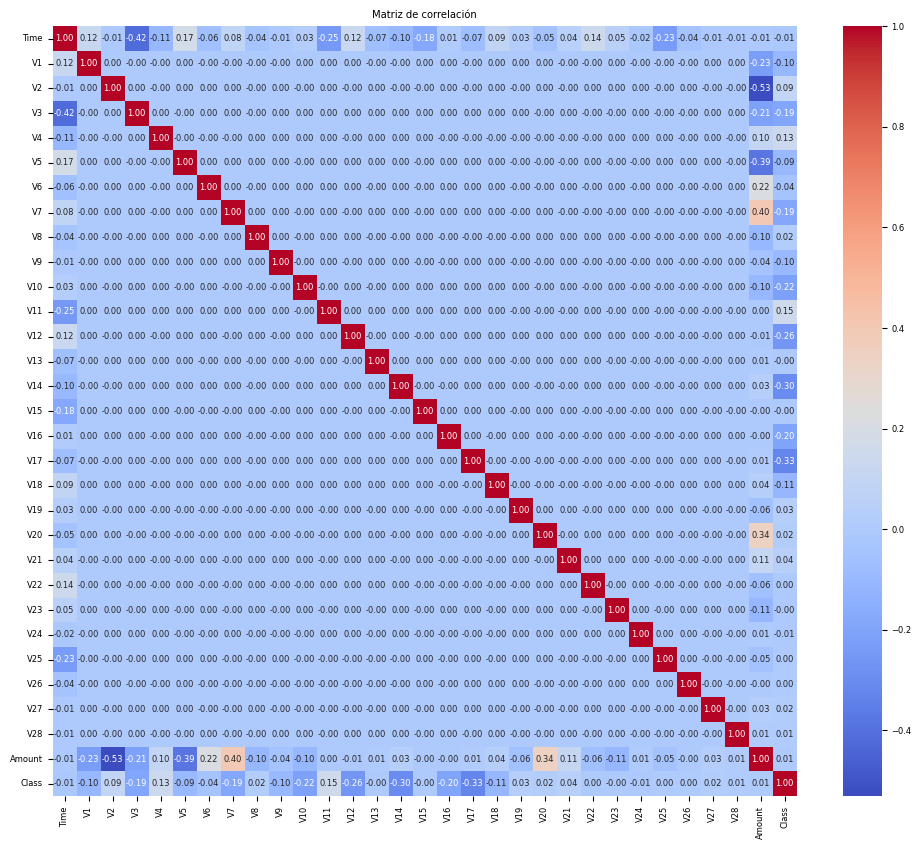

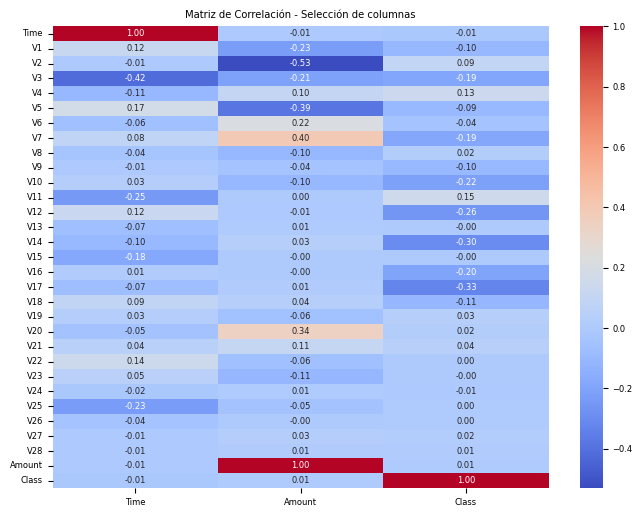

          Time      V1      V2      V3      V4      V5      V6      V7  \
Time    1.0000  0.1174 -0.0106 -0.4196 -0.1053  0.1731 -0.0630  0.0847   
Amount -0.0106 -0.2277 -0.5314 -0.2109  0.0987 -0.3864  0.2160  0.3973   
Class  -0.0123 -0.1013  0.0913 -0.1930  0.1334 -0.0950 -0.0436 -0.1873   

            V8      V9  ...    V21     V22     V23     V24     V25     V26  \
Time   -0.0369 -0.0087  ... 0.0447  0.1441  0.0511 -0.0162 -0.2331 -0.0414   
Amount -0.1031 -0.0442  ... 0.1060 -0.0648 -0.1126  0.0051 -0.0478 -0.0032   
Class   0.0199 -0.0977  ... 0.0404  0.0008 -0.0027 -0.0072  0.0033  0.0045   

           V27     V28  Amount   Class  
Time   -0.0051 -0.0094 -0.0106 -0.0123  
Amount  0.0288  0.0103  1.0000  0.0056  
Class   0.0176  0.0095  0.0056  1.0000  

[3 rows x 31 columns]


In [86]:
# calculamos la correlacion entre los componentes principales y la variable objetivo Class
# Reducimos la fuente de los numeros para que se vean mas pequeños
plt.rcParams.update({'font.size': 6})
correlation_matrix = df_eda.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de correlación')
plt.show()

# modificamos el grafico anterior para mostrar solo en las columnas Time, Amount y Class
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.loc[:, ['Time', 'Amount', 'Class']], annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación - Selección de columnas')
plt.show()

# Transponemos la matriz de correlacion para ver las filas Time, Amount y Class
correlation_transposed = correlation_matrix.loc[:, ['Time', 'Amount', 'Class']].T
print(correlation_transposed)   


***
<a id="item3"></a>
### <font color="Greenyellow">3. ETL (Extracción, transformación y carga de datos)</font>
[Volver al indice](#item0)

#### <font color="Greenyellow">3.1. Extracción de datos</font>

In [87]:
df = df_eda.copy()

#### <font color="Greenyellow">3.2. Transformación de datos</font>

In [88]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14701,25927.0000,-0.2999,1.0074,1.0713,0.8148,0.7199,0.2806,0.7786,-0.0100,-0.8116,...,0.1310,0.4615,-0.2613,-0.7419,0.0307,-0.1618,0.1606,0.1288,26.5900,0
128878,78872.0000,-0.1907,-0.5053,1.2014,-2.1529,-1.4867,0.0920,-1.7889,-2.6226,-2.3491,...,-1.5687,-0.3714,0.0439,0.0123,0.6202,-0.4465,0.0685,0.2284,83.4000,0
265264,161808.0000,-1.5308,1.4319,-0.6079,-1.5572,0.9852,-1.5652,1.4045,-0.0779,-0.2502,...,0.1374,0.6305,-0.6125,0.0525,0.6254,0.1215,0.1166,-0.1055,3.8500,0
213190,139146.0000,-3.5973,3.6967,-2.6513,-1.7106,-0.0378,-1.8205,0.8149,0.5428,1.2827,...,0.0222,0.8316,0.0937,0.0948,0.3471,0.1162,1.3201,0.8255,0.9200,0
120005,75675.0000,-0.6404,0.9521,1.7201,0.3582,0.2182,-0.0843,0.5766,-0.1149,-0.5545,...,-0.1223,-0.1114,0.0735,0.2294,-0.7035,0.1305,-0.0498,-0.0234,1.7900,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### <font color="Greenyellow">3.2.1. Seleccion de campos</font>

In [90]:
# Eliminamos la columna 'Time' ya que no aporta valor
df = df.drop(columns=['Time'])

##### <font color="Greenyellow">3.2.2. Normalización de datos</font>

In [91]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,...,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [92]:
# Normalizamos la variable 'Amount' para que sus valores esten entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Amount']] = scaler.fit_transform(df[['Amount']])
# Normalizamos las variables 'V1' a 'V28' para que sus valores esten entre -1 y 1
scaler_2 = StandardScaler()
df[df.columns[1:28]] = scaler_2.fit_transform(df[df.columns[1:28]])

In [93]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,...,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0034,0.0017
std,1.9587,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0097,0.0415
min,-56.4075,-44.0353,-31.8717,-4.0139,-82.4081,-19.6361,-35.2094,-61.3025,-12.2280,-22.5819,...,-47.4191,-15.0656,-71.7545,-4.6836,-19.7503,-5.4011,-55.9066,-46.7461,0.0000,0.0000
25%,-0.9204,-0.3625,-0.5872,-0.5994,-0.5011,-0.5767,-0.4479,-0.1747,-0.5854,-0.4917,...,-0.3109,-0.7473,-0.2592,-0.5855,-0.6084,-0.6781,-0.1755,-0.1604,0.0002,0.0000
50%,0.0181,0.0397,0.1186,-0.0140,-0.0394,-0.2058,0.0324,0.0187,-0.0468,-0.0853,...,-0.0401,0.0093,-0.0179,0.0677,0.0318,-0.1081,0.0033,0.0341,0.0009,0.0000
75%,1.3156,0.4867,0.6775,0.5250,0.4433,0.2992,0.4611,0.2741,0.5435,0.4169,...,0.2537,0.7283,0.2364,0.7257,0.6728,0.4997,0.2256,0.2372,0.0030,0.0000
max,2.4549,13.3578,6.1880,11.9187,25.2141,55.0201,97.4782,16.7515,14.1949,21.8076,...,37.0347,14.4730,36.0767,7.5697,14.4253,7.2940,78.3194,102.5434,1.0000,1.0000


#### <font color="Greenyellow">3.3. Carga de datos en base de datos SQLite</font>

##### <font color="Greenyellow">3.3.1. INSERT en base de datos</font>

In [94]:
# Abrimos la conexion a la base de datos
conexion_bbdd = sqlite3.connect(f'{carpeta_base_datos}/{nombre_bbdd}')
# Hacemos INSERT de nuestros datos a la base de datos
df.to_sql('tabla_fraude', conexion_bbdd, if_exists='replace', index=False)
# Cerramos la conexion
conexion_bbdd.close()

##### <font color="Greenyellow">3.3.2. Prueba de SELECT</font>

In [95]:
df_select = funciones.extraer_datos_fraude(carpeta_base_datos=carpeta_base_datos)
df_select.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,...,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0034,0.0017
std,1.9587,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0097,0.0415
min,-56.4075,-44.0353,-31.8717,-4.0139,-82.4081,-19.6361,-35.2094,-61.3025,-12.2280,-22.5819,...,-47.4191,-15.0656,-71.7545,-4.6836,-19.7503,-5.4011,-55.9066,-46.7461,0.0000,0.0000
25%,-0.9204,-0.3625,-0.5872,-0.5994,-0.5011,-0.5767,-0.4479,-0.1747,-0.5854,-0.4917,...,-0.3109,-0.7473,-0.2592,-0.5855,-0.6084,-0.6781,-0.1755,-0.1604,0.0002,0.0000
50%,0.0181,0.0397,0.1186,-0.0140,-0.0394,-0.2058,0.0324,0.0187,-0.0468,-0.0853,...,-0.0401,0.0093,-0.0179,0.0677,0.0318,-0.1081,0.0033,0.0341,0.0009,0.0000
75%,1.3156,0.4867,0.6775,0.5250,0.4433,0.2992,0.4611,0.2741,0.5435,0.4169,...,0.2537,0.7283,0.2364,0.7257,0.6728,0.4997,0.2256,0.2372,0.0030,0.0000
max,2.4549,13.3578,6.1880,11.9187,25.2141,55.0201,97.4782,16.7515,14.1949,21.8076,...,37.0347,14.4730,36.0767,7.5697,14.4253,7.2940,78.3194,102.5434,1.0000,1.0000


In [96]:
df_select.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105036,1.4917,-0.6380,-0.5125,-1.3302,-0.0993,0.3674,-0.5053,-0.0010,-2.1360,1.4319,...,-0.6959,-1.6921,-0.1368,-2.8978,0.8696,-0.6961,0.0127,-0.0218,0.0024,0
65585,1.1172,0.2177,-0.2746,0.8979,0.0828,-0.5993,0.2650,-0.0719,0.0255,-0.4180,...,-0.0713,-0.3190,-0.1668,-0.0816,1.1353,-0.6804,0.0387,0.1292,0.0019,0
233375,1.7768,-0.4883,-0.5037,0.1527,-0.3172,0.1468,-0.4877,0.1518,1.0423,0.0385,...,0.3957,0.8967,0.0547,0.5664,-0.3344,-0.5865,-0.0048,-0.0796,0.0045,0
70259,-4.1920,-3.8885,0.3860,-0.5282,-3.1759,0.9279,2.8503,-0.1749,-1.8499,-0.7437,...,0.9912,-0.7972,5.9804,0.2526,1.8708,-0.7649,-1.2422,0.6507,0.0605,0
143569,-0.3534,0.0687,1.1188,-0.2616,-1.1001,0.0126,-0.3461,0.1283,-0.5823,0.2918,...,0.2383,1.1484,0.2146,0.7814,-1.6829,-0.6298,-0.2807,-0.2939,0.0026,0
